#  Description of the problem or question you are studying or trying to solve:
**Here we will show How Dimensional Reduction help us:**

- **1.visualization: to understand our data distribution by dealing with more than 2D..**
- **2.reduce noise: by remove less important feature.**
- **3.preserve useful info in low memory.**
- **4.less time complexity .**
- **5.less space complexit**

**There are two principal algorithms for dimensionality reduction: Linear Discriminant Analysis ( LDA ) and Principal Component Analysis ( PCA ). The basic difference between these two is that LDA uses information of classes to find new features in order to maximize its separability while PCA uses the variance of each feature to do the same. In this context, LDA can be consider a supervised algorithm and PCA an unsupervised algorithm.**

**The PCA algorithm use the concepts of variance matrix, covariance matrix, eigenvector and eigenvalues pairs to perform PCA, providing a set of eigenvectors and its respectively eigenvalues as a result.**

# Short description of the dataset you have selected.

**Vehicle Dataset:**

This dataset stores some measures of four vehicles’s silhouettes with the purpose of classification. It is composed by 946 examples and 18 measures ( attributes ) all numerics values.this data describe each car by its size, color, circularity, compactness, radius, number of seats, number of doors. 


In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
import numpy as np
from scipy.spatial.distance import cdist
import pandas as pd
import seaborn as sns
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score


In [2]:
# Load dataset
data = pd.read_csv("vehicle.csv",index_col=0)

In [3]:
data.head()

,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
compactness,,,,,,,,,,,,,,,,,,
95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197,van
91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,van
104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196,saab
93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207,van
85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183,bus


In [4]:
data.columns


Index(['circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio', 'class'],
      dtype='object')

In [5]:
data.describe()

,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
count,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.00000,846.000000,846.000000,846.000000,846.000000,846.000000
mean,44.861702,82.088652,168.940898,61.693853,8.567376,168.839243,40.933806,20.582742,147.998818,188.625296,439.911348,174.70331,72.462175,6.377069,12.599291,188.932624,195.632388
std,6.169866,15.771533,33.472183,7.888251,4.601217,33.244978,7.811560,2.592138,14.515652,31.394837,176.692614,32.54649,7.486974,4.918353,8.931240,6.163949,7.438797
min,33.000000,40.000000,104.000000,47.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.00000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,40.000000,70.000000,141.000000,57.000000,7.000000,146.250000,33.000000,19.000000,137.000000,167.000000,318.250000,149.00000,67.000000,2.000000,5.000000,184.000000,190.250000
50%,44.000000,80.000000,167.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,178.500000,364.000000,173.00000,71.500000,6.000000,11.000000,188.000000,197.000000
75%,49.000000,98.000000,195.000000,65.000000,10.000000,198.000000,46.000000,23.000000,159.000000,217.000000,587.000000,198.00000,75.000000,9.000000,19.000000,193.000000,201.000000
max,59.000000,112.000000,333.000000,138.000000,55.000000,265.000000,61.000000,29.000000,188.000000,320.000000,1018.000000,268.00000,135.000000,22.000000,41.000000,206.000000,211.000000


In [6]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 846 entries, 95 to 85
Data columns (total 18 columns):
circularity                    846 non-null int64
distance_circularity           846 non-null int64
radius_ratio                   846 non-null int64
pr.axis_aspect_ratio           846 non-null int64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  846 non-null int64
elongatedness                  846 non-null int64
pr.axis_rectangularity         846 non-null int64
max.length_rectangularity      846 non-null int64
scaled_variance                846 non-null int64
scaled_variance.1              846 non-null int64
scaled_radius_of_gyration      846 non-null int64
scaled_radius_of_gyration.1    846 non-null int64
skewness_about                 846 non-null int64
skewness_about.1               846 non-null int64
skewness_about.2               846 non-null int64
hollows_ratio                  846 non-null int64
class                          846 non-null o

# Check the blance of the classes label in data

In [7]:
data['class'].value_counts()   


bus     218
saab    217
opel    212
van     199
Name: class, dtype: int64

# label encoding

In [8]:
data.replace({"bus": 0, "saab": 1,"opel":2,"van":3}, inplace=True)

In [9]:
data.head()

,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
compactness,,,,,,,,,,,,,,,,,,
95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197,3
91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,3
104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196,1
93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207,3
85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183,0


# Check if there outlier  in data set for some features


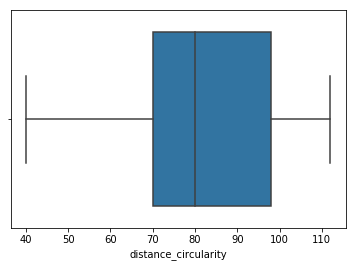

In [10]:
sns.boxplot(x=data['distance_circularity'])

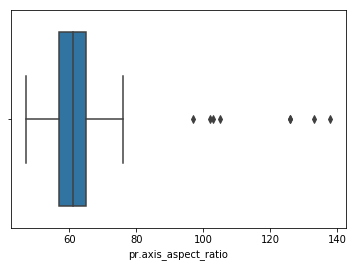

In [11]:
sns.boxplot(x=data['pr.axis_aspect_ratio'])

In [12]:
# Above plot shows  points between 95 to 140, these are outliers as there are not included in the box of other observation i.e no where near the quartiles.

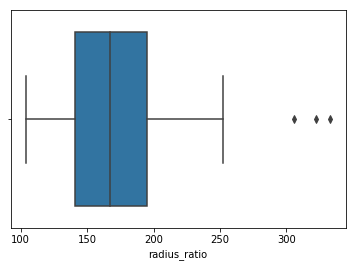

In [13]:
# Check if there outlier  in data set
sns.boxplot(x=data['radius_ratio'])

#  remove outliers from a Pandas DataFrame

In [14]:
len(data)   # number of rows befor remove the outliers

846

In [15]:
z_scores = zscore(data)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
new_df = data[filtered_entries]


In [16]:
len(new_df)       # number of rows after remove the outliers

825

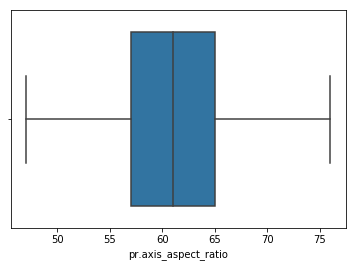

In [17]:
sns.boxplot(x=new_df['pr.axis_aspect_ratio'])

In [18]:
# Above plot shows these are no outliers 

In [19]:
new_df1 = new_df.drop("class",axis=1)
X = new_df.iloc[:,:-1]
Y= new_df['class']
Y = Y.values.reshape(-1,1)
Y = pd.DataFrame(Y)

In [20]:
X.head()

,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
compactness,,,,,,,,,,,,,,,,,
95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197
91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199
104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196
93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207
107,57,106,172,50,6,255,26,28,169,280,957,264,85,5,9,181,183


In [21]:
Y.head()

,0
0,3
1,3
2,1
3,3
4,0


In [22]:
#X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)


In [23]:
#X_train.shape, X_test.shape


In [24]:
Y1=np.array(Y[0])

In [25]:
Y1

array([3, 3, 1, 3, 0, 0, 3, 3, 1, 3, 1, 0, 3, 0, 2, 3, 0, 1, 2, 0, 3, 0,
       0, 1, 3, 1, 1, 0, 1, 3, 1, 2, 2, 2, 3, 0, 1, 0, 2, 3, 3, 1, 1, 3,
       3, 0, 3, 1, 1, 1, 2, 0, 0, 3, 1, 3, 2, 3, 2, 2, 3, 0, 0, 2, 0, 2,
       3, 0, 2, 2, 2, 2, 3, 2, 1, 1, 0, 0, 0, 0, 3, 2, 0, 3, 3, 0, 2, 1,
       2, 1, 3, 0, 2, 1, 0, 2, 0, 3, 3, 3, 0, 1, 2, 2, 0, 0, 3, 3, 2, 2,
       3, 3, 2, 1, 0, 0, 1, 3, 3, 3, 3, 0, 0, 3, 0, 1, 1, 3, 2, 3, 3, 1,
       3, 1, 0, 2, 0, 2, 2, 3, 0, 1, 3, 1, 0, 2, 1, 3, 0, 2, 3, 1, 2, 2,
       2, 1, 1, 2, 2, 1, 1, 0, 3, 2, 0, 3, 0, 3, 0, 2, 0, 0, 3, 1, 2, 0,
       1, 1, 0, 0, 2, 2, 2, 2, 3, 1, 0, 1, 0, 1, 0, 0, 0, 3, 1, 2, 2, 3,
       3, 2, 0, 0, 2, 2, 3, 0, 0, 2, 2, 1, 2, 0, 3, 2, 3, 0, 0, 1, 3, 1,
       3, 1, 1, 3, 1, 0, 1, 3, 3, 0, 0, 2, 0, 2, 2, 0, 1, 3, 3, 0, 1, 2,
       1, 3, 2, 3, 0, 3, 1, 1, 2, 1, 2, 1, 1, 3, 3, 1, 0, 0, 1, 3, 3, 0,
       1, 3, 3, 0, 0, 0, 2, 1, 0, 2, 0, 0, 1, 3, 1, 0, 3, 2, 1, 3, 0, 3,
       0, 0, 0, 1, 1, 0, 1, 2, 0, 3, 0, 0, 1, 2, 2,

# Data Scaling¶


In [26]:
sc_X = MinMaxScaler()
X_sc = sc_X.fit_transform(X)


#  Using PCA for reduction by 2 features


In [27]:
 #Create a Covariance Matrix
covar_matrix = PCA(n_components = 17) #we have 17 features


In [28]:
#Calculate Eigenvalues
covar_matrix.fit(X_sc)
variance = covar_matrix.explained_variance_ratio_ #calculate variance ratios

var=np.cumsum(np.round(covar_matrix.explained_variance_ratio_, decimals=3)*100)
var #cumulative sum of variance explained with [n] features


array([54.8, 75.1, 82.9, 89.5, 93.4, 96.3, 97.7, 98.4, 98.8, 99.1, 99.4,
       99.6, 99.7, 99.8, 99.9, 99.9, 99.9])

**In the above array that the first feature explains 54.6% of the variance within our data set while the first two explain 75.1 and so on. If we employ 8 features we capture 98.4% of the variance within the dataset**

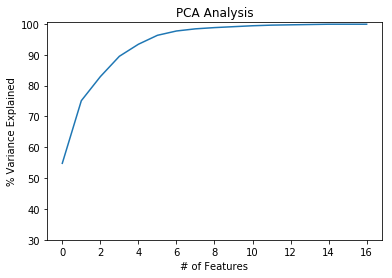

In [29]:
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(30,100.5)
plt.style.context('seaborn-whitegrid')


plt.plot(var)

# Using PCA reduction by8 features

In [30]:
X_reduced = PCA(n_components=8)
X_reduced_sc=X_reduced.fit_transform(X)

# Perform Clustering using appropriate methods for both befor and after applying PCA

- a.Kmeans 
- b.Hierarchical Clustering
- c.Gaussian Mixture Models/Expectation Maximization
- d.DBSCAN 


# Kmeans on original data befor applying PCA

In [31]:
from sklearn import cluster
km = cluster.KMeans(n_clusters=4)              # we select the value for k here for a trail
y_cluster_kmeans = km.fit_predict(X_sc)

**# Evaluate K-means by different values for K**

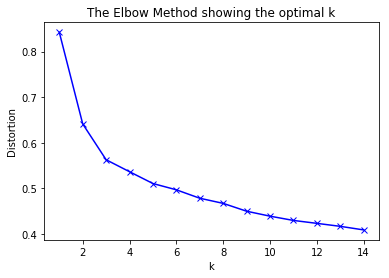

In [32]:
# k means determine k
distortions = []
K = range(1,15)
for k in K:
    kmeanModel = cluster.KMeans(n_clusters=k).fit(X_sc)
    kmeanModel.fit(X_sc)
    distortions.append(sum(np.min(cdist(X_sc, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

- note: here we will pick K value to be 3 

# # Cluster Validation:
- we here have External indices data so we will use Adjusted Rand Score and make sure by using silhouette_score regrding the whole data distribution

In [33]:
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn import cluster


# # Kmeans on original data before apping PCA


In [34]:
km = cluster.KMeans(n_clusters=3)              # we select the value for k =3
y_cluster_kmeans = km.fit_predict(X_sc)

In [35]:
Y1.shape,y_cluster_kmeans.shape

((825,), (825,))

In [36]:
adjusted_rand_score(y_cluster_kmeans,Y1)            #accurcy of clustering of original data

0.08040389759002237

In [37]:
silhouette_score(X_sc,y_cluster_kmeans)

0.30588056346729126

# Kmeans on reduced data After applying PCA


In [38]:
km_PCA = cluster.KMeans(n_clusters=4)
y_cluster_kmeans_PCA = km_PCA.fit_predict(X_reduced_sc)

In [39]:
adjusted_rand_score(y_cluster_kmeans_PCA,Y1)              #accurcy of clustering of reduction data point

0.12589460964256055

In [40]:
silhouette_score(X_reduced_sc,y_cluster_kmeans_PCA)

0.465346006688263

# Hierarchical Clustering on original data


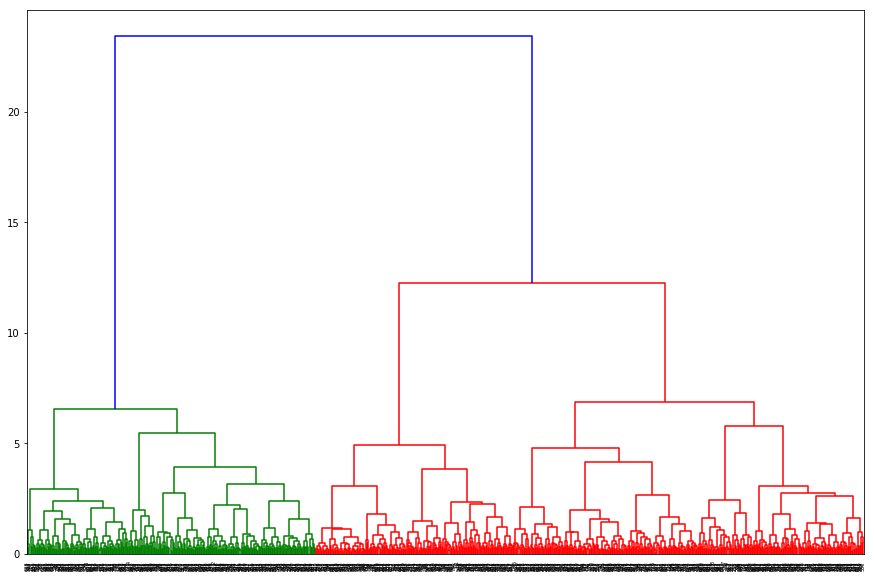

In [41]:
from scipy.cluster.hierarchy import dendrogram , ward,single
linkage = ward(X_sc)
plt.figure(figsize=(15,10))
dendrogram(linkage)

plt.show()

# Hierarchical Clustering on reduced data After applying PCA


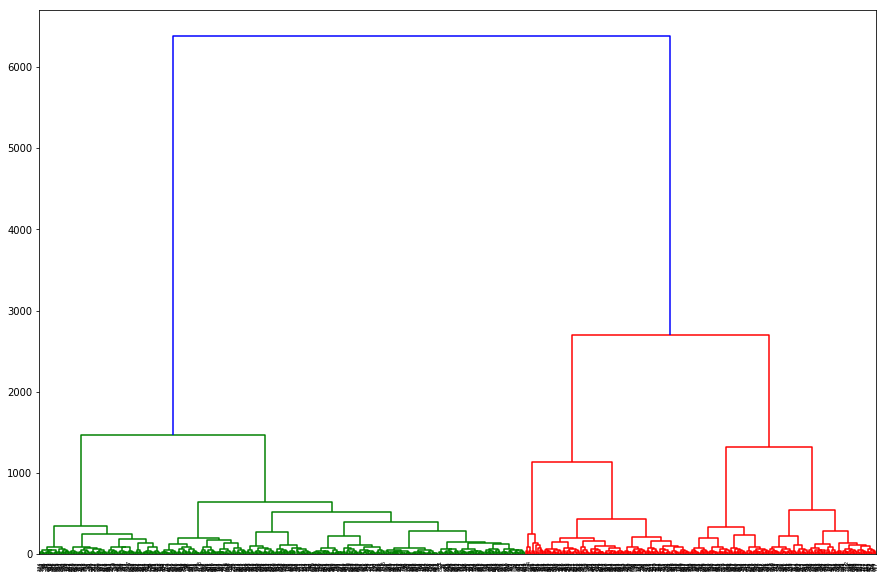

In [42]:
linkage_pca = ward(X_reduced_sc)
plt.figure(figsize=(15,10))
dendrogram(linkage_pca)

plt.show()

# DBScan based Clustering on original data point


In [43]:
sp = cluster.SpectralClustering(n_clusters=3)
labelsDB = sp.fit_predict(X_sc)

In [44]:
adjusted_rand_score(labelsDB, Y1)    #accurcy of clustering of original data

0.06668054251843981

In [45]:
silhouette_score(X_sc,labelsDB)

0.29886094529629653

# DBScan based Clustering on reduced data After applying PCA


In [46]:
sp_pca= cluster.SpectralClustering(n_clusters=3)
labelsDB_pca = sp_pca.fit_predict(X_reduced_sc)

C:\Users\Mohammed\Anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


In [47]:
adjusted_rand_score(labelsDB_pca, Y1)   #accurcy of clustering of reduction data point

-8.080111731690912e-05

In [48]:
silhouette_score(X_reduced_sc,labelsDB_pca)

-0.18844622452563245

#  Gaussian Mixture Models/Expectation Maximization on original data

In [49]:
from sklearn.mixture import GaussianMixture

In [50]:
gmm = GaussianMixture(n_components=3).fit(X_sc)
labels_gmm = gmm.predict(X_sc)


In [51]:
adjusted_rand_score(labels_gmm, Y1)                #accurcy of clustering of original data

0.09076653951313422

In [52]:
silhouette_score(X_sc,labels_gmm)

0.28595652273709254

# # Apply GMM on reduced data After applying PCA


In [53]:
gmm_pca = GaussianMixture(n_components=3).fit(X_reduced_sc)
labels_gmm_pca = gmm_pca.predict(X_reduced_sc)
adjusted_rand_score(labels_gmm_pca, Y1)       #accurcy of clustering of reduction data point

0.09617245259103034

In [54]:
silhouette_score(X_reduced_sc,labels_gmm)

0.28030781911876085

# # Finally  after apply 4 algorithms on original data point and data point after applying PCA and compare the result regarding to the acuracy of clustering 


#  We found that the best cluster model apply on this data is Kmeans and to work on the reduced data After applying PCA  


**as we mentiond there was a large drope in the accuracy after and before applying K-means on original data and reduced data**

# Further study: 


# We can apply dimention reduction method by (LDA)   or "Fisher Linear Discriminant "  that may give us better accuracy in some condition because LDA deals directly with discrimination between classes while PCA does not pay attention to the underlying class structure.

In [55]:
 X_reduced_sc=pd.DataFrame(X_reduced_sc)

# here is K-means algorithm using first  2 features of reduced data

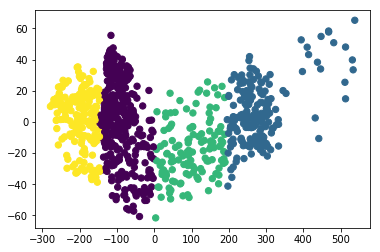

In [56]:
plt.scatter(X_reduced_sc[0], X_reduced_sc[1], c=y_cluster_kmeans_PCA, s=40, cmap='viridis')


# here is K-means algorithm using first  2 features of original data

In [57]:
X_sc=pd.DataFrame(X_sc)

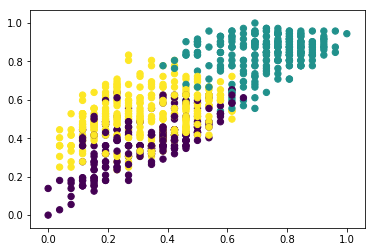

In [58]:
plt.scatter(X_sc[0], X_sc[1], c=y_cluster_kmeans, s=40, cmap='viridis')
